In [6]:
import pandas as pd
import numpy as np
import plotly as py

Deforestation

Kalimantan Barat
Kalimantan Selatan
Kalimantan Tengah
Kalimantan Timur


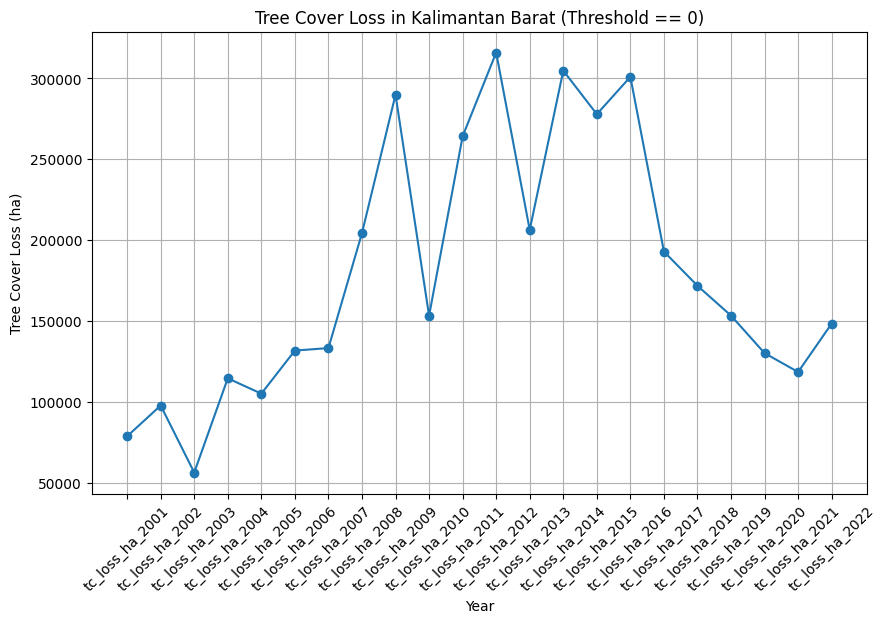

In [14]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Datasets/Deforestation/Subnational 1 tree cover loss.csv')

# Define the years to plot
years = [f'tc_loss_ha_{year}' for year in range(2001, 2023)]

# Filter the DataFrame for Kalimantan Barat and threshold == '0'
K_Barat_df = df[(df['subnational1'] == 'Kalimantan Barat') & (df['threshold'] == 0)]

# Plot the tree cover loss
plt.figure(figsize=(10, 6))
plt.plot(years, K_Barat_df[years].values.flatten(), marker='o')
plt.xlabel('Year')
plt.ylabel('Tree Cover Loss (ha)')
plt.title('Tree Cover Loss in Kalimantan Barat (Threshold == 0)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


